In [1]:
# Python Version
from platform import python_version
print(f"Python Version for this Project: {python_version()}")

Python Version for this Project: 3.10.5


In [2]:
# Getting the information about the jobs
def get_info(soup):
    # Getting the job title
    try:
        job_title = soup.find("h3", class_="base-search-card__title").text
        job_title = job_title.strip()
    except:
        job_title = ""
    
    # Getting the job company
    try:
        company = soup.find("h4", class_="base-search-card__subtitle").text
        company = company.strip()
    except:
        company = ""
    
    # Getting the job location
    try:
        location = soup.find("span", class_="job-search-card__location").text
        location = location.strip()
    except:
        location = ""
        
    # Getting the job annoucement date    
    try:
        job_date = soup.find("time", class_="job-search-card__listdate").text
        job_date = job_date.strip()
    except:
        job_date = ""
        
    # Getting the job link
    try:
        job_link = soup.find("a", class_="base-card__full-link absolute top-0 right-0 bottom-0 left-0 p-0 z-[2]")
        job_link = job_link.get("href")
    except:
        job_link = ""
    
    # Creating a dictionary to be used on the dataframe built
    job_list = dict( job_title=job_title,
                     company=company,
                     location=location,
                     job_date=job_date,
                     job_link=job_link)
    return job_list

In [5]:
# !pip install -q -U watermark
# !pip install -q -U plotly
# !pip install -q -U geopandas
# !pip install webdriver-manager

In [6]:
# Imports

# ---- Constants  -----
import CONSTANT as c

# ---- Automation -----
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys

from time import sleep

# ---- WebScraping ----
from bs4 import BeautifulSoup
import requests

# ---- Data Analysis ----
import pandas as pd
import numpy as np

# ---- Data Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

In [7]:
%reload_ext watermark
%watermark -a "Airton Fabre" --iversions

Author: Airton Fabre

matplotlib: 3.7.2
requests  : 2.28.1
seaborn   : 0.12.2
geopandas : 0.14.2
pandas    : 2.1.4
numpy     : 1.23.1
plotly    : 5.18.0
selenium  : 4.16.0



In [8]:
# Creating a driver to access the web page
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [9]:
# Accessing the web page
page = driver.get("https://www.linkedin.com/jobs/search?keywords=Data%20Science&location=Brasil&geoId=106057199&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0")

In [10]:
element = driver.find_element('xpath', '//*[@id="main-content"]/section[2]/ul/li[1]/div/a')

# Using send_keys to interact with the element
for time in range(10):
    element.send_keys(Keys.END)
    sleep(3)

In [11]:
# Clicking at the "Mais Vagas" button
for time in range(23):
        driver.find_element('xpath', '//*[@id="main-content"]/section[2]/button').click()
        sleep(3)

In [103]:
# Getting the HTML text
page_source = driver.page_source

# Converting into a HTML code
soup = BeautifulSoup(page_source, "html.parser")

In [104]:
# Getting all the jobs
job_list = soup.find_all("div", class_="base-card")

# Getting the individual jobs information
jobs = []

for job in job_list:
    job_info = get_info(job)
    jobs.append(job_info)

In [105]:
# Creating the dataframe
df = pd.DataFrame(jobs)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job_title  942 non-null    object
 1   company    942 non-null    object
 2   location   942 non-null    object
 3   job_date   942 non-null    object
 4   job_link   942 non-null    object
dtypes: object(5)
memory usage: 36.9+ KB


In [106]:
df.head()

,job_title,company,location,job_date,job_link
0,DATA SCIENTIST INTERN,Mundiale,Brazil,,https://br.linkedin.com/jobs/view/data-scienti...
1,Faça sua Carreira de Dados no Itaú 🚀🧡,Itaú Unibanco,"São Paulo, SP",Há 5 meses,https://br.linkedin.com/jobs/view/fa%C3%A7a-su...
2,Gerente de Produtos - Antifraude,Quod,"Barueri, SP",Há 1 mês,https://br.linkedin.com/jobs/view/gerente-de-p...
3,Cientista de Dados - Melhoria de Performance,Cielo,"Barueri, SP",Há 1 dia,https://br.linkedin.com/jobs/view/cientista-de...
4,DATA SCIENCE JUNIOR - 100% REMOTO - BANCO DE T...,TalentX Digital [Attract.Ignite.Triumph.],Brazil,Há 2 semanas,https://br.linkedin.com/jobs/view/data-science...


<p style= "font-family: bookman old style;"
          "font-size: 8px;">Now it's time to extract the city, state and country, and to do that we will need to use Engineering Attribute and create three new columns.</p>

In [107]:
cities = []
states = []
countries = []

# Spliting the column content
for i in range(len(df)):
    location_parts = df["location"].str.split(",").iloc[i]

    try: # In case of the column has only 1 element, it means that it's the country
        if len(location_parts) <= 1:
            countries.append(location_parts[0].strip())
            cities.append("Not Available")
        else:
            cities.append(location_parts[0].strip())
    except IndexError:
        cities.append("Not Available")

    try:
        states.append(location_parts[1].strip())
    except IndexError:
        states.append("Not Available")

    try:
        if len(location_parts) <= 1:
            pass
        else:
            countries.append(location_parts[2].strip())
    except IndexError:
        countries.append("Brazil")

In [108]:
# Creating the columns with the desired content
df["city"] = cities
df["state"] = states
df["country"] = countries

In [109]:
df.head(3)

,job_title,company,location,job_date,job_link,city,state,country
0,DATA SCIENTIST INTERN,Mundiale,Brazil,,https://br.linkedin.com/jobs/view/data-scienti...,Not Available,Not Available,Brazil
1,Faça sua Carreira de Dados no Itaú 🚀🧡,Itaú Unibanco,"São Paulo, SP",Há 5 meses,https://br.linkedin.com/jobs/view/fa%C3%A7a-su...,São Paulo,SP,Brazil
2,Gerente de Produtos - Antifraude,Quod,"Barueri, SP",Há 1 mês,https://br.linkedin.com/jobs/view/gerente-de-p...,Barueri,SP,Brazil


In [110]:
# Removing the location column
df = df.drop("location", axis=1)
df.head(3)

,job_title,company,job_date,job_link,city,state,country
0,DATA SCIENTIST INTERN,Mundiale,,https://br.linkedin.com/jobs/view/data-scienti...,Not Available,Not Available,Brazil
1,Faça sua Carreira de Dados no Itaú 🚀🧡,Itaú Unibanco,Há 5 meses,https://br.linkedin.com/jobs/view/fa%C3%A7a-su...,São Paulo,SP,Brazil
2,Gerente de Produtos - Antifraude,Quod,Há 1 mês,https://br.linkedin.com/jobs/view/gerente-de-p...,Barueri,SP,Brazil


In [111]:
# Creating a copy from the dataframe
df2 = df.copy()

In [112]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job_title  942 non-null    object
 1   company    942 non-null    object
 2   job_date   942 non-null    object
 3   job_link   942 non-null    object
 4   city       942 non-null    object
 5   state      942 non-null    object
 6   country    942 non-null    object
dtypes: object(7)
memory usage: 51.6+ KB


In [113]:
# NaN values?
df.isna().sum()

job_title    0
company      0
job_date     0
job_link     0
city         0
state        0
country      0
dtype: int64

<p style="font-family: bookman old style;">Treating the job title column</p>

In [114]:
df["job_title"] = df["job_title"].str.title() 

In [115]:
# Getting the indexes from the desired rows
scientist1 =  df[df["job_title"].str.contains("Data Sci*")].index
scientist2 = df[df["job_title"].str.contains("Cien*")].index
scientist3 = df[df["job_title"].str.contains("Ciênci*")].index
analytics = df[df["job_title"].str.contains("Anali*")].index
engineer = df[df["job_title"].str.contains("Engenhe*")].index
bi = df[df["job_title"].str.contains("Busi*")].index

In [116]:
# Changing the row values based on the indexes
df["job_title"][scientist1] = "Cientista De Dados"
df["job_title"][scientist2] = "Cientista De Dados"
df["job_title"][scientist3] = "Cientista De Dados"
df["job_title"][analytics] = "Analista De Dados"
df["job_title"][engineer] = "Engenheiro De Dados"
df["job_title"][bi] = "Business Intelligence"

In [117]:
df.loc[df["job_title"].str.contains("De Dados\s+")]

,job_title,company,job_date,job_link,city,state,country
1,Faça Sua Carreira De Dados No Itaú 🚀🧡,Itaú Unibanco,Há 5 meses,https://br.linkedin.com/jobs/view/fa%C3%A7a-su...,São Paulo,SP,Brazil
24,Estágio Em Análise De Dados E Bi,Carglass® Brasil,Há 1 mês,https://br.linkedin.com/jobs/view/est%C3%A1gio...,Barueri,SP,Brazil
107,Pessoa Estagiaria De Dados - Afirmativa Para M...,Cogna Educação,Há 1 mês,https://br.linkedin.com/jobs/view/pessoa-estag...,São Paulo,SP,Brazil
192,Assistente De Dados - (Foco Em Sql),Grupo Qualiconsig,,https://br.linkedin.com/jobs/view/assistente-d...,São Paulo,SP,Brazil
270,Estágio Em Consultoria De Dados - Vaga Afirmat...,Artefact,Há 5 dias,https://br.linkedin.com/jobs/view/est%C3%A1gio...,São Paulo,SP,Brazil
341,Tecnólogo Em Análise De Dados E Bi,UPBET,Há 2 dias,https://br.linkedin.com/jobs/view/tecn%C3%B3lo...,São Paulo,Brazil,Brazil
544,Pessoa Consultora De Dados - Vaga Afirmativa P...,Artefact,Há 1 semana,https://br.linkedin.com/jobs/view/pessoa-consu...,São Paulo,SP,Brazil
703,Estágio Em Consultoria De Dados - Vaga Afirmat...,Artefact,Há 1 semana,https://br.linkedin.com/jobs/view/est%C3%A1gio...,São Paulo,SP,Brazil
727,Coordenação De Produtos De Dados (Data Product...,klavi,Há 1 mês,https://br.linkedin.com/jobs/view/coordena%C3%...,São Paulo,SP,Brazil
788,Pessoa Consultora De Dados - Vaga Afirmativa P...,Artefact,Há 1 semana,https://br.linkedin.com/jobs/view/pessoa-consu...,São Paulo,SP,Brazil


In [118]:
# Assuming 'jobs_for_city' is your Series
jobs_for_city = df.groupby(["company", "job_title"])["state"].agg("count").sort_values(ascending=False).reset_index()

# jobs_for_city = jobs_for_city.drop("index", axis=1)
jobs_for_city

,company,job_title,state
0,BNE - Banco Nacional de Empregos,Desenvolvedor,17
1,BNE - Banco Nacional de Empregos,Estatístico,12
2,Shopee,Analista De Dados,10
3,BNE - Banco Nacional de Empregos,Estagiário,9
4,Aditum,Cientista De Dados,6
...,...,...,...
755,GLOBAL HITSS,Cientista De Dados,1
756,GM PROMO,Cientista De Dados,1
757,GOL Linhas Aéreas,Cientista De Dados,1
758,GOVERNANÇABRASIL - GOVBR,Analista De Dados,1


In [119]:
# Checking the country column
df[df["country"].str.contains("Greater")].head(5)

,job_title,company,job_date,job_link,city,state,country
36,Cientista De Dados,TDW Bi Consulting,Há 2 meses,https://br.linkedin.com/jobs/view/cientista-de...,Not Available,Not Available,Greater São Paulo Area
78,[Banco De Talentos] Mulheres Na Ti,Atlântico,Há 1 mês,https://br.linkedin.com/jobs/view/banco-de-tal...,Not Available,Not Available,Greater Fortaleza
82,Cientista De Dados,Zippi,Há 1 semana,https://br.linkedin.com/jobs/view/staff-data-s...,Not Available,Not Available,Greater São Paulo Area
89,Engenheiro De Dados,G4F,Há 3 semanas,https://br.linkedin.com/jobs/view/engenheiro-d...,Not Available,Not Available,Greater Goiania
99,Cientista De Dados,Mollica IT,Há 2 dias,https://br.linkedin.com/jobs/view/pessoa-cient...,Not Available,Not Available,Greater São Paulo Area


<p style="font-family: bookman ol style;">Notice that there's not information for city and state in this case, but we know that Greater São Paulo means that city belongs to the SP state and to the São Paulo city, so we are going to implement the values for the city and state column based on the country information.</p>

In [121]:
# Changing the City column
df["city"] = np.where(df["country"].isin(["Greater São Paulo Area"]), "São Paulo", df["city"])
df["city"] = np.where(df["country"].isin(["Greater Campinas"]), "Campinas", df["city"])
df["city"] = np.where(df["country"].isin(["Greater Goiania"]), "Goiania", df["city"])
df["city"] = np.where(df["country"].isin(["Greater Porto Alegre"]), "Porto Alegre", df["city"])
df["city"] = np.where(df["country"].isin(["Greater Curitiba"]), "Curitiba", df["city"])
df["city"] = np.where(df["country"].isin(["Greater Fortaleza"]), "Fortaleza", df["city"])


In [122]:
# Chaning the State column
df["state"] = np.where(df["country"].isin(["Greater São Paulo Area"]), "SP", df["state"])
df["state"] = np.where(df["country"].isin(["Greater Campinas"]), "SP", df["state"])
df["state"] = np.where(df["country"].isin(["Greater Goiania"]), "GO", df["state"])
df["state"] = np.where(df["country"].isin(["Greater Porto Alegre"]), "RS", df["state"])
df["state"] = np.where(df["country"].isin(["Greater Curitiba"]), "PR", df["state"])
df["state"] = np.where(df["country"].isin(["Greater Fortaleza"]), "CE", df["state"])

In [123]:
df[df["country"].str.contains("Greater")].head(5)

,job_title,company,job_date,job_link,city,state,country
36,Cientista De Dados,TDW Bi Consulting,Há 2 meses,https://br.linkedin.com/jobs/view/cientista-de...,São Paulo,SP,Greater São Paulo Area
78,[Banco De Talentos] Mulheres Na Ti,Atlântico,Há 1 mês,https://br.linkedin.com/jobs/view/banco-de-tal...,Fortaleza,CE,Greater Fortaleza
82,Cientista De Dados,Zippi,Há 1 semana,https://br.linkedin.com/jobs/view/staff-data-s...,São Paulo,SP,Greater São Paulo Area
89,Engenheiro De Dados,G4F,Há 3 semanas,https://br.linkedin.com/jobs/view/engenheiro-d...,Goiania,GO,Greater Goiania
99,Cientista De Dados,Mollica IT,Há 2 dias,https://br.linkedin.com/jobs/view/pessoa-cient...,São Paulo,SP,Greater São Paulo Area


In [124]:
# Replacing "Greater" from country to "Brazil"
df["country"] = df["country"].str.replace(r"Greater.*", "Brazil", regex=True)

<div>
    <h5 style="font-family: bookman old style;">Q1: What are the Top 10 In-Demand Job Titles in Brazil?</h5>
</div>

In [125]:
# Top 10 job title with highest demand job oppotunities
top_10 = df["job_title"].value_counts()
top_10= top_10.head(10)

In [126]:
# Creating the axes
y = top_10.index
x = top_10.values

In [127]:
%config InlineBackend.figure_format = "svg"

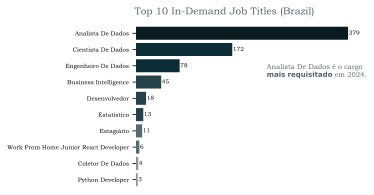

In [130]:
# Creating the figure and axes
fig, ax = plt.subplots(figsize=(4, 3))

# Creating the barplot
ax = sns.barplot(y=y, x=x, orient="h", palette=c.PALLETE)

# Removing the borders
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Labels
plt.ylabel("")
plt.yticks(size=6, fontfamily=c.FONT)
plt.xticks([])
plt.xlabel("")

# Title
fig.text(y=0.93,
         x=0.12,
         s="Top 10 In-Demand Job Titles (Brazil)",
         fontdict={"family": c.FONT,
                   # "weight": "bold",
                   "size": 10,
                   "color": "#031D24"},
         alpha=0.7)

# Insight
fig.text(y=0.64,
         x=0.58,
         s=f"{y[0]} é o cargo \n$\\bf{{mais}}$ $\\bf{{requisitado}}$ em 2024.",
         fontdict={"family": c.FONT,
                   "size": 7,
                   "color": "#031D24"},
         alpha=0.7)

# Data label
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v),
            color='black', 
            ha='left', 
            va='center', 
            size=6, 
            fontfamily=c.FONT)

# Save the entire figure by specifying bbox_inches
plt.savefig("firstplot.png", bbox_inches='tight', dpi=300)

# Show
plt.show()


In [47]:
# df_sorted = pd.DataFrame({"job_title": y, "demand": x}).sort_values(by="demand",
#                                                                    ascending=True)
# df_sorted

,job_title,demand
7,Anotador De Imagem,2
8,Programa De Estágio Ibm Associates Brasil - 3Q,2
9,Work From Home Junior React Developer,2
6,Python Developer,3
5,Coletor De Dados,4
4,Estatístico,13
3,Business Intelligence,32
2,Engenheiro De Dados,47
1,Cientista De Dados,159
0,Analista De Dados,322


In [48]:
# # Creating the horizontal bar plot with Plotly Express
# fig = px.bar(df_sorted, 
#              y="job_title", 
#              x="demand", 
#              orientation='h',
#              labels={'Job Title': '', 'Count': ''},
#              title="Top 10 In-Demand Job Titles (Brazil)",
#              text='demand',
#              template="plotly_white",
#              color="demand",
#              color_continuous_scale="Greys")

# # # Customize the plot
# fig.update_layout(font=dict(family=c.FONT),
#                   xaxis=dict(visible=False, showticklabels=False),
#                   yaxis=dict(title='', tickfont=dict(size=9, family=c.FONT)),
#                   title=dict(x=0.542,
#                              y=0.87, 
#                              xanchor='center',
#                              yanchor='top',
#                              font=dict(size=15, color="#031D24")))

# # Add an outline (border) to the bars
# fig.update_traces(marker=dict(line=dict(color='black', width=0.2)))

# # Show the plot
# fig.show()

<div>
    <h5 style="font-family: bookman old style;">Q2: What are the Top 10 In-Demand Companies Job Opportunities?</h5>
</div>

In [131]:
# Getting the top 10 companies
top_10_companies = df.groupby("company")["job_title"].agg(["count"]).sort_values(by="count", ascending=False).reset_index()
top_10_companies = top_10_companies.head(10)

In [132]:
# Creating the axes
x = top_10_companies["count"]
y = top_10_companies["company"]

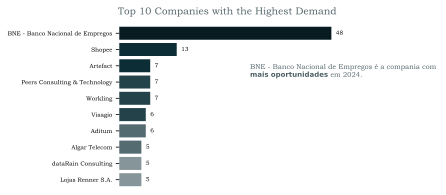

In [134]:
# Creating the figure and axes
fig, ax = plt.subplots(figsize=(4, 3))

# Creating the barplot
ax = sns.barplot(y=y, x=x, orient="h", palette=c.PALLETE)

# Removing the borders
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Labels
plt.ylabel("")
plt.yticks(size=6, fontfamily=c.FONT)
plt.xticks([])
plt.xlabel("")

# Title
fig.text(y=0.93,
         x=0.12,
         s="Top 10 Companies with the Highest Demand",
         fontdict={"family": c.FONT,
                   # "weight": "bold",
                   "size": 10,
                   "color": "#031D24"},
         alpha=0.7)

# Insight
fig.text(y=0.64,
         x=0.58,
         s=f"{y[0]} é a compania com \n$\\bf{{mais}}$ $\\bf{{oportunidades}}$ em 2024.",
         fontdict={"family": c.FONT,
                   "size": 7,
                   "color": "#031D24"},
         alpha=0.7)

# Data label
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v),
            color='black', 
            ha='left', 
            va='center', 
            size=6, 
            fontfamily=c.FONT)

# Save the entire figure by specifying bbox_inches
plt.savefig("firstplot.png", bbox_inches='tight', dpi=300)

# Show
plt.show()


In [135]:
# df_sorted = pd.DataFrame({"company": y, "demand": x}).sort_values(by="demand",
#                                                                  ascending=True)
# df_sorted

In [136]:
# # Creating the horizontal bar plot with Plotly Express
# fig = px.bar(df_sorted, 
#              y="company", 
#              x="demand", 
#              orientation='h',
#              labels={'Job Title': '', 'Count': ''},
#              title="Top 10 In-Demand Job Titles (Brazil)",
#              text='demand',
#              template="plotly_white",
#              color="demand",
#              color_continuous_scale="Greys",
#              hover_name=df_sorted["company"])

# # # Customize the plot
# fig.update_layout(font=dict(family=c.FONT),
#                   xaxis=dict(visible=False, showticklabels=False),
#                   yaxis=dict(title='', tickfont=dict(size=9, family=c.FONT)),
#                   title=dict(x=0.57,
#                              y=0.87, 
#                              xanchor='center',
#                              yanchor='top',
#                              font=dict(size=15, color="#031D24")))

# # Add an outline (border) to the bars
# fig.update_traces(marker=dict(line=dict(color='black', width=0.2)))

# # Show the plot
# fig.show()

<div>
    <h5 style="font-family: bookman old style;">Q3: What are the Job Opportunities Frequency?</h5>
</div>

In [137]:
# Aggregating for published date based on the job title
dates = df.groupby(["job_date"])["job_title"].agg(["count"]).sort_values(by="count", ascending=False).head(5).reset_index()
dates

,job_date,count
0,Há 1 mês,215
1,Há 1 semana,115
2,Há 2 meses,79
3,Há 2 semanas,68
4,Há 1 dia,66


In [138]:
# Getting the axes
x = dates["job_date"]
y = dates["count"]

In [139]:
# Sum the counts for the specified time periods
sum_counts = dates[dates['job_date'].isin(['Há 1 dia', 'Há 1 mês', 'Há 3 semanas', 'Há 1 semana', 'Há 2 semanas'])]['count'].sum()
sum_counts

464

In [140]:
# Calculating the percentage of job opportunities over one month
job_over_one_month = f"{(sum_counts / df['job_title'].count() * 100):.2f}"
job_over_one_month

'49.26'

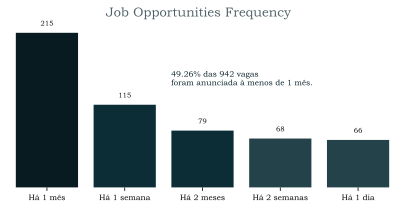

In [184]:
fig, ax = plt.subplots(figsize=(7, 3))

ax = sns.barplot(x=x, y=y, orient="v", palette=c.PALLETE)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# labels
plt.ylabel("")
plt.yticks([])
plt.xticks(size=8, family=c.FONT)
plt.xlabel("")

# Data Label
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                size = 7,
                fontfamily="bookman old style")
    
fig.text(x=0.45,
         y=0.6,
         s=f"{job_over_one_month}% das {df['job_title'].count()} vagas\nforam anunciada à menos de 1 mês.",
         fontdict={"size": 8,
                   "family": c.FONT,
                   "color": c.PALLETE[0]})
    
fig.text(x=0.32,
         y=0.92,
         s="Job Opportunities Frequency",
         fontdict={"size": 13,
                   "family": c.FONT,
                   "color": c.PALLETE[0]},
         alpha=0.7)

plt.show()

In [157]:
# # Creating the vertical bar plot with Plotly Express
# fig = px.bar(dates, 
#              x="job_date", 
#              y="count", 
#              orientation='v',
#              labels={'Job Title': '', 'Job Opportunities Frequency': ''},
#              title="Job Opportunities Frequency",
#              text='count',
#              template='plotly_white',
#              height=400,
#              color_continuous_scale="Greys",
#              color="count")
             
             

# # Customize the plot
# fig.update_layout(font=dict(family="bookman old style"),
#                   xaxis=dict(title='', showticklabels=True, tickfont=dict(size=9)),
#                   yaxis=dict(visible=False),
#                   title=dict(x=0.53,
#                              y=0.85, 
#                              xanchor='center',
#                              yanchor='top',
#                              font=dict(size=17, color="#031D24")),
#                      annotations=[dict(x=4,
#                                        y=120,
#                                        xanchor='right',
#                                        yanchor='middle',
#                                        text=f"{((sum_counts / df['job_title'].count()) * 100):.0f}% of the {df['job_title'].count()} job opportunities\n",
#                                     font=dict(size=9, color="#031D24")),
#                                     dict(x=4,
#                                        y=110,
#                                        xanchor='right',
#                                        yanchor='middle',
#                                        text="were published over a month.",
#                                     font=dict(size=9, color="#031D24"))])

# fig.update_traces(marker=dict(line=dict(color='black', width=0.2)))

# # Show the plot
# fig.show()

<div>
    <h5 style="font-family: bookman old style;">Q4: What are the 10 Cities with Highest Demand?</h5>
</div>

In [185]:
# Aggregating for city based on the job title
cities = df.groupby(["city"])["job_title"].agg(["count"]).sort_values(by="count", ascending=False).reset_index().head(11)
cities

,city,count
0,São Paulo,364
1,Not Available,119
2,Rio de Janeiro,51
3,Belo Horizonte,41
4,Brasília,34
5,Curitiba,26
6,Barueri,19
7,Porto Alegre,18
8,Fortaleza,17
9,Campinas,15


<p style="font-family: bookman old style;">Notice that there's a "Not Available" value, it's because there are some oppotunities with only the Country information, so, as we don't know the city of these opportunities we are not going to consider this.</p>

In [186]:
# Removing the "Not Available" index values
city_to_rm = cities[cities["city"] == "Not Available"].index
cities = cities.drop(index=city_to_rm)
cities

,city,count
0,São Paulo,364
2,Rio de Janeiro,51
3,Belo Horizonte,41
4,Brasília,34
5,Curitiba,26
6,Barueri,19
7,Porto Alegre,18
8,Fortaleza,17
9,Campinas,15
10,São José dos Campos,14


In [187]:
# Creating the axes
y = cities["city"]
x = cities["count"]

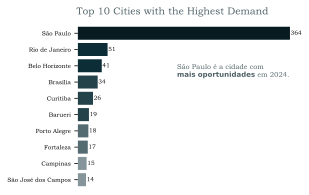

In [192]:
# Creating the figure and axes
fig, ax = plt.subplots(figsize=(4, 3))

# Creating the barplot
ax = sns.barplot(y=y, x=x, orient="h", palette=c.PALLETE)

# Removing the borders
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Labels
plt.ylabel("")
plt.yticks(size=6, fontfamily=c.FONT)
plt.xticks([])
plt.xlabel("")

# Title
fig.text(y=0.93,
         x=0.12,
         s="Top 10 Cities with the Highest Demand",
         fontdict={"family": c.FONT,
                   # "weight": "bold",
                   "size": 10,
                   "color": "#031D24"},
         alpha=0.7)

# Insight
fig.text(y=0.64,
         x=0.47,
         s=f"{y[0]} é a cidade com \n$\\bf{{mais}}$ $\\bf{{oportunidades}}$ em 2024.",
         fontdict={"family": c.FONT,
                   "size": 7,
                   "color": "#031D24"},
         alpha=0.7)

# Data label
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v),
            color='black', 
            ha='left', 
            va='center', 
            size=6, 
            fontfamily=c.FONT)

# Save the entire figure by specifying bbox_inches
plt.savefig("firstplot.png", bbox_inches='tight', dpi=300)

# Show
plt.show()


In [193]:
# df_sorted = pd.DataFrame({"city": y, "demand": x}).sort_values(by="demand",
#                                                               ascending=True)
# df_sorted

In [194]:
# # Creating the horizontal bar plot with Plotly Express
# fig = px.bar(df_sorted, 
#              y="city", 
#              x="demand", 
#              orientation='h',
#              labels={'Job Title': '', 'Count': ''},
#              title="Top 10 Cities for In-Demand Job Opportunities",
#              text='demand',
#              template="plotly_white",
#              color="demand",
#              color_continuous_scale="Greys",
#              hover_name=df_sorted["city"])

# # # Customize the plot
# fig.update_layout(font=dict(family=c.FONT),
#                   xaxis=dict(visible=False, showticklabels=False),
#                   yaxis=dict(title='', tickfont=dict(size=9, family=c.FONT)),
#                   title=dict(x=0.57,
#                              y=0.87, 
#                              xanchor='center',
#                              yanchor='top',
#                              font=dict(size=15, color="#031D24")))

# # Add an outline (border) to the bars
# fig.update_traces(marker=dict(line=dict(color='black', width=0.2)))

# # Show the plot
# fig.show()

<div>
    <h5 style="font-family: bookman old style;">Q5: What are Top the 10 States with Highest Demand?</h5>
</div>

In [195]:
# Aggregating for state based on the job title
states = df.groupby(["state"])["job_title"].agg(["count"]).sort_values(by="count", ascending=False).reset_index().head(11)
states

,state,count
0,SP,463
1,Not Available,119
2,MG,62
3,RJ,52
4,RS,39
5,PR,38
6,DF,34
7,SC,27
8,GO,19
9,Brazil,18


<p style="font-family: bookman old style">We have the same problem as we had with cities when it comes to "Not Available" values, so let's do the same.</p>

In [196]:
# Removing the "Not Available" index values 
state_to_rm = states[states["state"] == "Not Available"].index
states = states.drop(index=state_to_rm)
states

,state,count
0,SP,463
2,MG,62
3,RJ,52
4,RS,39
5,PR,38
6,DF,34
7,SC,27
8,GO,19
9,Brazil,18
10,CE,17


<p>Notice that "Brazil" is been used as a state, let's check it out.</p>

In [197]:
df[df["state"].isin(["Brazil"])]

,job_title,company,job_date,job_link,city,state,country
16,Analista De Dados,SulAmérica,Há 2 dias,https://br.linkedin.com/jobs/view/consultor-a-...,São Paulo,Brazil,Brazil
22,Cientista De Dados,Hospital Vila da Serra,Há 1 semana,https://br.linkedin.com/jobs/view/est%C3%A1gio...,São Paulo,Brazil,Brazil
39,Analista De Dados,Central IT - Tecnologia em Negócios,Há 1 semana,https://br.linkedin.com/jobs/view/analista-de-...,Federal District,Brazil,Brazil
64,Analista De Dados,ICM Group,Há 2 semanas,https://br.linkedin.com/jobs/view/recruitment-...,Rio de Janeiro,Brazil,Brazil
96,Analista De Dados,Hospital Vila da Serra,Há 2 dias,https://br.linkedin.com/jobs/view/analista-de-...,São Paulo,Brazil,Brazil
227,Cientista De Dados,Tata Consultancy Services,Há 3 semanas,https://br.linkedin.com/jobs/view/data-science...,São Paulo,Brazil,Brazil
281,Cientista De Dados,Aditum,Há 1 semana,https://br.linkedin.com/jobs/view/cientista-de...,São Paulo,Brazil,Brazil
298,Banco De Talentos - Estágio,Atvos,Há 3 dias,https://br.linkedin.com/jobs/view/banco-de-tal...,São Paulo,Brazil,Brazil
341,Tecnólogo Em Análise De Dados E Bi,UPBET,Há 2 dias,https://br.linkedin.com/jobs/view/tecn%C3%B3lo...,São Paulo,Brazil,Brazil
373,Analista De Dados,Deal,Há 4 dias,https://br.linkedin.com/jobs/view/analista-de-...,São Paulo,Brazil,Brazil


In [198]:
# Getting the index
sp_index = df[(df["city"] == "São Paulo") & (df["state"] == "Brazil")].index
df_index = df[(df["city"] == "Brasilia") & (df["state"] == "Brazil")].index
df1_index = df[(df["city"] == "Federal District") & (df["state"] == "Brazil")].index
rj_index = df[(df["city"] == "Rio de Janeiro") & (df["state"] == "Brazil")].index

In [199]:
# Using the correct index for each assignment
df.loc[sp_index, "state"] = "SP"
df.loc[df_index, "state"] = "DF"
df.loc[df1_index, "state"] = "DF"
df.loc[df1_index, "city"] = "Brasilia"
df.loc[rj_index, "state"] = "RJ"
df.loc[df_index, "city"] = "Brasilia"

In [200]:
# Aggregating for state based on the job title
states = df.groupby(["state"])["job_title"].agg(["count"]).sort_values(by="count", ascending=False).reset_index().head(11)

In [201]:
# Removing the "Not Available" index values 
state_to_rm = states[states["state"] == "Not Available"].index
states = states.drop(index=state_to_rm)
states

,state,count
0,SP,478
2,MG,62
3,RJ,54
4,RS,39
5,PR,38
6,DF,35
7,SC,27
8,GO,19
9,CE,17
10,BA,9


In [202]:
# Defining the axes
x = states["state"]
y = states["count"]

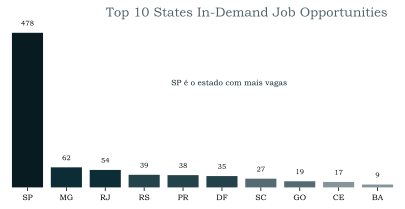

In [205]:
fig, ax = plt.subplots(figsize=(7, 3))

ax = sns.barplot(x=x, y=y, orient="v", palette=c.PALLETE)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# labels
plt.ylabel("")
plt.yticks([])
plt.xticks(size=8, family=c.FONT)
plt.xlabel("")

# Data Label
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                size = 7,
                fontfamily="bookman old style")
    
fig.text(x=0.45,
         y=0.6,
         s=f"{states['state'][0]} é o estado com mais vagas",
         fontdict={"size": 8,
                   "family": c.FONT,
                   "color": c.PALLETE[0]})
    
fig.text(x=0.32,
         y=0.92,
         s="Top 10 States In-Demand Job Opportunities",
         fontdict={"size": 13,
                   "family": c.FONT,
                   "color": c.PALLETE[0]},
         alpha=0.7)

plt.show()

In [206]:
# # Creating the vertical bar plot with Plotly Express
# fig = px.bar(states, 
#              x="state", 
#              y="count", 
#              orientation='v',
#              labels={'Job Title': '', 'Job Opportunities Frequency': ''},
#              title="Top 10 States In-Demand Job Opportunities",
#              text='count',
#              template='plotly_white',
#              height=400,
#              color_continuous_scale="Greys",
#              color="count")
             
             

# # Customize the plot
# fig.update_layout(font=dict(family="bookman old style"),
#                   xaxis=dict(title='', showticklabels=True, tickfont=dict(size=9)),
#                   yaxis=dict(visible=False),
#                   title=dict(x=0.53,
#                              y=0.85, 
#                              xanchor='center',
#                              yanchor='top',
#                              font=dict(size=17, color="#031D24")),
#                      annotations=[dict(x=4,
#                                        y=120,
#                                        xanchor='right',
#                                        yanchor='middle',
#                                        text=f"The state with the highest demand opportinity is {states['state'][0]}")])

# fig.update_traces(marker=dict(line=dict(color='black', width=0.2)))

# # Show the plot
# fig.show()

In [226]:
# Getting the geo infomartion from a package
gdf = gpd.read_file(r"ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shx")

In [227]:
gdf.head(5)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 states provinces,3,ARG-1309,1309,AR-E,None,AR,1,Entre Ríos,Entre-Rios,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-58.20011 -32.44713, -58.20012 -32.4..."
1,Admin-1 states provinces,6,URY-8,8,UY-PA,None,UY,1,Paysandú,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-58.20012 -32.44720, -58.20011 -32.4..."
2,Admin-1 states provinces,2,IDN-1185,1185,ID-KI,None,ID,5,Kalimantan Timur,Kaltim,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
3,Admin-1 states provinces,6,MYS-1186,1186,MY-12,None,MY,5,Sabah,North Borneo,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
4,Admin-1 states provinces,3,CHL-2694,2694,CL-AP,None,CL,1,Arica y Parinacota,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.50611 -17.5..."


In [228]:
# Filtering the states from Brazil
br_states = gdf[gdf["adm1_code"].str.contains("BR")]

In [229]:
br_states["iso_3166_2"].head(3)

103    BR-RS
264    BR-RR
267    BR-PA
Name: iso_3166_2, dtype: object

<p style="font-family: bookman old style;">Notice that before the UF state, there's the country's acronym, so to allow the recognition and merging between the dataframes, it'll be necessary to remove the country's acronym.</p>

In [230]:
# Creating the state column removing the country's acronym
gdf["state"] = br_states["iso_3166_2"].apply(lambda x: x.split("-")[1])

In [231]:
# Creating a dataframe to be merged with the gdf dataframe
states = df.groupby(["state"])["job_title"].agg(["count"]).sort_values(by="count", ascending=False).reset_index()
states.head(3)

,state,count
0,SP,478
1,Not Available,119
2,MG,62


In [232]:
# Removing the "Not Available" index values 
state_to_rm = states[states["state"] == "Not Available"].index
states = states.drop(index=state_to_rm)
states.head(3)

,state,count
0,SP,478
2,MG,62
3,RJ,54


In [233]:
# Merge the GeoDataFrame and DataFrame
merged = gdf.merge(states, left_on='state', right_on='state', how='left')
merged.head(3)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry,state,count
0,Admin-1 states provinces,3,ARG-1309,1309,AR-E,None,AR,1,Entre Ríos,Entre-Rios,...,None,None,None,None,None,None,None,"POLYGON ((-58.20011 -32.44713, -58.20012 -32.4...",NaN,NaN
1,Admin-1 states provinces,6,URY-8,8,UY-PA,None,UY,1,Paysandú,None,...,None,None,None,None,None,None,None,"POLYGON ((-58.20012 -32.44720, -58.20011 -32.4...",NaN,NaN
2,Admin-1 states provinces,2,IDN-1185,1185,ID-KI,None,ID,5,Kalimantan Timur,Kaltim,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",NaN,NaN


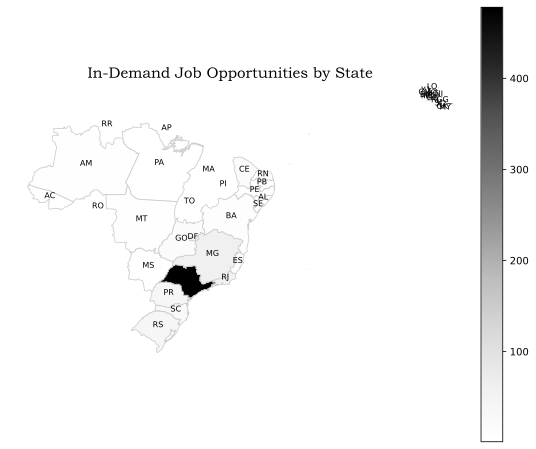

In [236]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
merged.plot(column='count', cmap='Greys', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

merged.apply(lambda x: ax.annotate(text=x['state'] if pd.notna(x['state']) else '', xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1)

# Customize plot
ax.set_title('In-Demand Job Opportunities by State',
             fontdict={'fontsize': '15',
                       'fontweight': '3',
                       "family": c.FONT})

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks([])
plt.yticks([])

# Show plot
plt.show()

In [224]:
# Set the DataFrame index to the "state" column
# merged = merged.set_index("state")

In [225]:
# # Plotting a Map with Plotly
# fig = px.choropleth_mapbox(merged,
#                            geojson=merged.geometry,
#                            locations=merged.index,
#                            color='count',
#                            color_continuous_scale="Greys",
#                            range_color=(merged['count'].min(),
#                                         merged['count'].max()),
#                            mapbox_style="carto-positron",
#                            center={"lat": -15, "lon": -55},
#                            zoom=2.5,
#                            opacity=0.7,
#                            labels={'count': 'In-Demand Jobs'})

# # Show plot
# fig.show()

<div>
    <h5 style="font-family: bookman old style;">Q6: What are the Hierarchy Position In-Demand?</h5>
</div>

In [93]:
df2["job_title"] = df2["job_title"].str.title()
df2["job_title"]

0                                  Data Scientist Intern
1                  Faça Sua Carreira De Dados No Itaú 🚀🧡
2                       Gerente De Produtos - Antifraude
3           Cientista De Dados - Melhoria De Performance
4      Data Science Junior - 100% Remoto - Banco De T...
                             ...                        
713                           Pessoa Engenheira De Dados
714                      Analista De Dados Sênior | Vptp
715                            Cientista De Dados Sênior
716                                             Back-End
717             Analista Ciência Dados Sr | Raízen Power
Name: job_title, Length: 718, dtype: object

In [94]:
pl1 = df2[df2["job_title"].str.contains(r"\s+Pl", regex=True)].index
pl2 = df2[df2["job_title"].str.contains(r"\s+PL", regex=True)].index

In [95]:
df2["job_title"][pl1] = "Pleno"
df2["job_title"][pl2] = "Pleno"

In [96]:
sr1 = df2[df2["job_title"].str.contains("Sên*")].index
sr2 = df2[df2["job_title"].str.contains("Seni*")].index

In [97]:
df2["job_title"][sr1] = "Senior"
df2["job_title"][sr2] = "Senior"

In [98]:
jr1 = df2[df2["job_title"].str.contains(r"\s+Juni", regex=True)].index
jr2 = df2[df2["job_title"].str.contains(r"\s+Jú", regex=True)].index
jr3 = df2[df2["job_title"].str.contains(r"\s+Jr", regex=True)].index
jr4 = df2[df2["job_title"].str.contains(r"\s+JU", regex=True)].index

In [99]:
df2["job_title"][jr1] = "Júnior"
df2["job_title"][jr2] = "Júnior"
df2["job_title"][jr3] = "Júnior"
df2["job_title"][jr4] = "Júnior"

In [100]:
estagio1 = df2[df2["job_title"].str.contains("Estágio*")].index
estagio2 = df2[df2["job_title"].str.contains("Estagio*")].index

In [101]:
df2["job_title"][estagio1] = "Estagio"
df2["job_title"][estagio2] = "Estagio"

In [102]:
df2.groupby("job_title")["state"].agg(["count"]).sort_values(by="count", ascending=False).tail(30)

,count
job_title,
Auxiliar De Manutenção - Sem Experiência Curso Técnico,1
Auxiliar De Ciência De Dados,1
Auditor Interno,1
Associado De Inteligência Artificial - Home Based (6 Vagas),1
Assistente Operacional,1
Assistente De Produtos E Negócios - Gestão De Dados,1
Assistente De Dados - (Foco Em Sql),1
Assistente Administrativo - Segurança Empresarial,1
Applied Data Scientist,1





<h1 style="font-family: bookman old style";>Conclusion:</h1>
<p style="font-family: bookman old style";>It won't be possible to answer this question, once we have a lot of different scenarios and not all of the job opportunities has the position declared.</p>